In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Monte_Carlo_Simulations_in_Python/datasets/'
import pandas as pd


In [6]:
# exercise 01

"""
Wrong deterministic calculation

In this exercise and the next, you'll play around with the pi calculations from the video to further understand the importance of each step in the simulation process.

Recall that the simulation to find pi generates random points (x,y)where x and y are between -1 and 1, as shown in the graph below.

A graph of a circle inside a square with randomly sampled points

What if you incorrectly changed the deterministic calculation where you check whether a point should be added to circle_points? How will this affect the final result? You'll see from the wacky value you get for pi that correctly specifying deterministic calculations is essential for Monte Carlo simulations!

random has been imported for you.
"""

# Instructions

"""


    Increment circle_points for any point with a distance from origin of less than 0.75 (rather than a distance of one as demonstrated in the video).

"""

# solution

import random

n = 10000
circle_points = 0 
square_points = 0 
for i in range(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    dist_from_origin = x**2 + y**2
    # Increment circle_points for any point with a distance from origin of less than .75
    if dist_from_origin < 0.75:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

#----------------------------------#

# Conclusion

"""
Correct! Because the determination of circle points is wrongfully defined as the ones with a distance from the origin less than 0.75 rather than 1, the estimated pi value is far below the approximate value of 3.14 because many points that should be counted as circle points are not!
"""

2.3348


'\nCorrect! Because the determination of circle points is wrongfully defined as the ones with a distance from the origin less than 0.75 rather than 1, the estimated pi value is far below the approximate value of 3.14 because many points that should be counted as circle points are not!\n'

In [7]:
# exercise 02

"""
Wrong input distributions

You'll continue working with the pi example in this exercise: A graph of a circle inside a square with randomly sampled points

What happens if you change the input probability distribution from the continuous uniform distribution(random.uniform()) to the discrete uniform distribution(random.randint())? Your results will not be reliable, because random.randint() will sample discrete integers, while random.uniform() samples continuous float numbers.

Pay attention to the estimated pi value that this simulation generates. Because the incorrect probability distribution has been selected, it will not be very accurate! Choosing the correct probability distributions is essential for Monte Carlo simulations, and we will go into more detail on different distributions in later lessons so that you feel confident you are choosing the correct one going forward.

random has been imported for you.
"""

# Instructions

"""


    Sample the x and y coordinates in the interval from -1 to 1 using random.randint() rather than the correct random.uniform() function used in the video.

"""

# solution

n = 10000
circle_points = 0 
square_points = 0 
for i in range(n):
    # Sample the x and y coordinates from -1 to 1 using random.randint()
    x = random.randint(-1,1)
    y = random.randint(-1,1)
    dist_from_origin = x**2 + y**2
    if dist_from_origin <= 1:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

#----------------------------------#

# Conclusion

"""
You've followed the instructions correctly to generate ...a bad simulation! random.randint()is a discrete uniform distribution. When it is wrongfully picked as the input distribution, only the integers -1, 0, or 1 are picked. This illustrates that random.uniform(), the continuous uniform distribution, is more appropriate for sampling the x-y coordinates __continuously__. In the following lessons, we will go over some commonly used distributions to get a better understanding of them!
"""

2.248


"\nYou've followed the instructions correctly to generate ...a bad simulation! random.randint()is a discrete uniform distribution. When it is wrongfully picked as the input distribution, only the integers -1, 0, or 1 are picked. This illustrates that random.uniform(), the continuous uniform distribution, is more appropriate for sampling the x-y coordinates __continuously__. In the following lessons, we will go over some commonly used distributions to get a better understanding of them!\n"

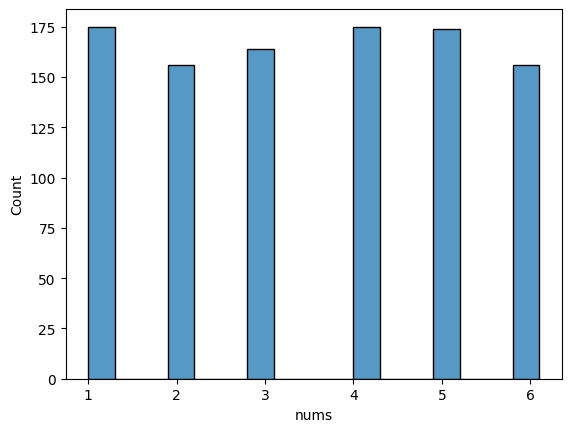

'\nWell done—your histplot makes it easy to see that if Tom rolls his die many times, he gets roughly uniformly distributed results between one and six!\n'

In [9]:
# exercise 03

"""
Sampling from a discrete uniform distribution

Tom has a regular six-sided die showing the numbers one through six. In this exercise, you'll use the discrete uniform distribution, which is perfectly suited for sampling integer values with uniform distributions, to simulate rolling Tom's die 1,000 times. You'll then visualize the results!

The following have been imported for you: seaborn as sns, scipy.stats as st and matplotlib.pyplot as plt.
"""

# Instructions

"""


    Define low and high for use in .rvs() sampling in the next step; your distribution should include integer values from one (the lowest possible roll outcome) through six (the highest possible roll outcome) uniformly.
    Sample 1,000 times from the discrete uniform distribution represented by st.randint with integer values one through six.

"""

# solution
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Define low and high for use in rvs sampling below
low = 1
high = 7
# Sample 1,000 times from the discrete uniform distribution
samples = st.randint.rvs(low, high, size=1000)

samples_dict = {'nums':samples}
sns.histplot(x='nums', data=samples_dict, bins=6, binwidth=0.3)
plt.show()

#----------------------------------#

# Conclusion

"""
Well done—your histplot makes it easy to see that if Tom rolls his die many times, he gets roughly uniformly distributed results between one and six!
"""

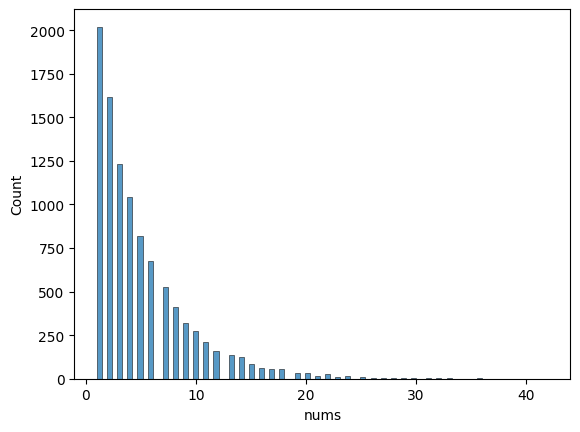

'\nGreat! You have successfully simulated the geometric distribution!\n'

In [10]:
# exercise 04

"""
Sampling from a geometric distribution

Eva has a biased coin that has a probability of turning heads only 20% of the time. Eva flips her coin and records the number of flips needed to get a result of heads.

The geometric distribution is perfectly suited to model the number of flips needed to reach a result of heads, with the success rate p defined as the probability of turning heads each time.

Your task is to use the geometric distribution to simulate Eva's coin flips to reach heads 10,000 times, recording the number of flips needed to reach heads each time. Then, you'll visualize the results!

The following have been imported for you: seaborn as sns, pandas as pd, SciPy's stats module as st, and matplotlib.pyplot as plt.
"""

# Instructions

"""


    Set p to the appropriate probability of success, where success is defined as flipping heads.
    Using p as the probability of success, sample from the geometric distribution st.geom 10,000 times.

"""

# solution

# Set p to the appropriate probability of success
p = 0.2

# Sample from the geometric distribution 10,000 times
samples = st.geom.rvs(p, size=10000)
samples_dict = {"nums":samples}
sns.histplot(x="nums", data=samples_dict)  
plt.show()

#----------------------------------#

# Conclusion

"""
Great! You have successfully simulated the geometric distribution!
"""

In [12]:
# exercise 05

"""
Betting between Tom and Eva

It's time to play a game between Tom and Eva!

Recall that Tom has a regular six-faced die and the results of rolling it follow a discrete uniform distribution in the interval of one and six. Eva has a biased coin that has a probability p of turning heads. The distribution of the number of flips Eva needs to land heads is geometric.

Here are the rules of the game:

    Tom's score: the point of the rolled die
    Eva's score: the number of flips needed to land heads
    The person with the highest score wins

Your task is to simulate this game! For the list of possible p values [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9] representing the probability of Eva's coin flipping heads, who do you expect to win?

NumPy has been imported as np and SciPy's stats module as st.
"""

# Instructions

"""


    Simulate rolling Tom's die 10,000 times, assigning the results to die_samples.
    Simulate Eva's coin flips to land heads 10,000 times, assigning the results to coin_samples.

"""

# solution

import numpy as np

for p in [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]: 
    low = 1
    high = 7
	# Simulate rolling Tom's die 10,000 times
    die_samples = st.randint.rvs(low, high, size = 10000)
	# Simulate Eva's coin flips to land heads 10,000 times
    coin_samples = st.geom.rvs(p, size=10000)
    diff = np.mean(die_samples - coin_samples)
    print(diff)

#----------------------------------#

# Conclusion

"""
Congrats! You have successfully simulated the game, and you can see that you'd expect Tom to score less than Eva when p has a value of 0.1 or 0.2. He is expected to score more when p is 0.3 and above!
"""

-6.3926
-1.4836
0.0896
1.5107
2.0684
2.2652
2.3952


"\nCongrats! You have successfully simulated the game, and you can see that you'd expect Tom to score less than Eva when p has a value of 0.1 or 0.2. He is expected to score more when p is 0.3 and above!\n"

In [16]:
# exercise 06

"""
Changing the mean of normal distributions

In this exercise, you'll use sampling to calculate the 95% confidence interval of the average height of American adult males. Recall from the lesson that the heights of American adult males are normally distributed with a mean of 177 centimeters and a standard deviation of eight centimeters.

After sampling from the distribution with the above sample statistics, you'll change the mean of the heights to 185 centimeters without changing the standard deviation to explore what happens to the mean and confidence interval of the average height after sampling again.

The following have been imported for you: random, NumPy as np, and SciPy's stats module as st.
"""

# Instructions

"""

    Sample 1,000 times from the normal distribution where the mean is 177 and the standard deviation is eight; store the results inheights_177_8.
    Sample 1,000 times from the normal distribution where the mean is 185 and the standard deviation is eight; store the results inheights_185_8.

"""

# solution

random.seed(1222)

# Sample 1,000 times from the normal distribution where the mean is 177
heights_177_8 = st.norm.rvs(loc=177, scale=8, size = 1000)
print(np.mean(heights_177_8))
upper = np.quantile(heights_177_8, 0.975)
lower = np.quantile(heights_177_8, 0.025)
print([lower, upper])

# Sample 1,000 times from the normal distribution where the mean is 185
heights_185_8 = st.norm.rvs(loc=185, scale=8, size = 1000)
print(np.mean(heights_185_8))
upper = np.quantile(heights_185_8, 0.975)
lower = np.quantile(heights_185_8, 0.025)
print([lower, upper])

#----------------------------------#

# Conclusion

"""
Well done! You may have noticed that the mean increased as expected, while the width of confidence interval stayed roughly the same but moved to the right with the increase in mean!
"""

176.8858406293693
[160.96862478141495, 193.32466683278713]
185.22880368098842
[169.47280088010143, 202.20818754770463]


'\nWell done! You may have noticed that the mean increased as expected, while the width of confidence interval stayed roughly the same but moved to the right with the increase in mean!\n'

In [17]:
# exercise 07

"""
Change the standard deviation of normal distributions

You'll continue exploring the heights of American adult males, which you now know are normally distributed with a mean of 177 centimeters and a standard deviation of eight centimeters.

In this exercise, you'll also sample from a normal distribution and calculate the 95% confidence interval of the average height. But this time, you'll change the standard deviation to 15 without changing the mean of the heights. You'll explore what will happen to the mean and confidence interval of the average height if you perform the sampling again!

The following have been imported for you: random, NumPy as np, and SciPy's stats module as st.
"""

# Instructions

"""
Sample 1,000 times from the normal distribution where the mean is 177 and the standard deviation is 15; store the results inheights_177_15.
"""

# solution

random.seed(1231)
heights_177_8 = st.norm.rvs(loc=177, scale=8, size=1000)
print(np.mean(heights_177_8))
upper = np.quantile(heights_177_8, 0.975)
lower = np.quantile(heights_177_8, 0.025)
print([lower, upper])

# Sample 1,000 times from the normal distribution where the standard deviation is 15
heights_177_15 = st.norm.rvs(loc=177, scale=15, size=1000)
print(np.mean(heights_177_15))
upper = np.quantile(heights_177_15, 0.975)
lower = np.quantile(heights_177_15, 0.025)
print([lower, upper])

#----------------------------------#

# Conclusion

"""
Nice work! As expected, the mean did not significantly change, and the width of the confidence interval increased with the increase in standard deviation!
"""

177.08799924823887
[161.77806437670552, 192.1689328178524]
176.26678649812465
[145.05001694648993, 204.76505703003292]


'\nNice work! As expected, the mean did not significantly change, and the width of the confidence interval increased with the increase in standard deviation!\n'

In [18]:
# exercise 08

"""
Two independent normal distributions

Rohit has two freelance jobs. The pay for each job follows two independent normal distributions:

    income1 from Rohit's first job has a mean of $500 and a standard deviation of $50
    income2 from Rohit's second job has a mean of $1,000 and a standard deviation of $200

Rohit has asked for your help simulating his income so that he can budget his expenses properly. You'll use sampling to find the 95% confidence interval of Rohit's total income from both jobs.

You are going to perform simulations using normal distributions, which are probably the most important probability distribution used in Monte Carlo simulation.

The following have been imported for you: NumPy as np, and SciPy's stats module as st.
"""

# Instructions

"""


    Use st.norm.rvs() to sample 1,000 times from the normal distribution, setting the proper mean and standard deviation and assigning the results to income1 and income2.
    Approximate total_income by adding income1 and income2 together.

"""

# solution

# Sample from the normal distribution
income1 = st.norm.rvs(loc=500, scale=50, size=1000)
income2 = st.norm.rvs(loc=1000, scale=200, size=1000)

# Define total_income
total_income = income1 + income2
upper = np.quantile(total_income, 0.975)
lower = np.quantile(total_income, 0.025)
print([lower, upper])

#----------------------------------#

# Conclusion

"""
Excellent work—you've found a confidence interval of Rohit's total income by sampling independently from two normal distributions! What if these two incomes are _not_ independent of each other? How could you sample under dependent conditions? That's the topic of the next lesson on multivariate random variable sampling!
"""

[1101.3056226196918, 1901.9016121515442]


"\nExcellent work—you've found a confidence interval of Rohit's total income by sampling independently from two normal distributions! What if these two incomes are _not_ independent of each other? How could you sample under dependent conditions? That's the topic of the next lesson on multivariate random variable sampling!\n"

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


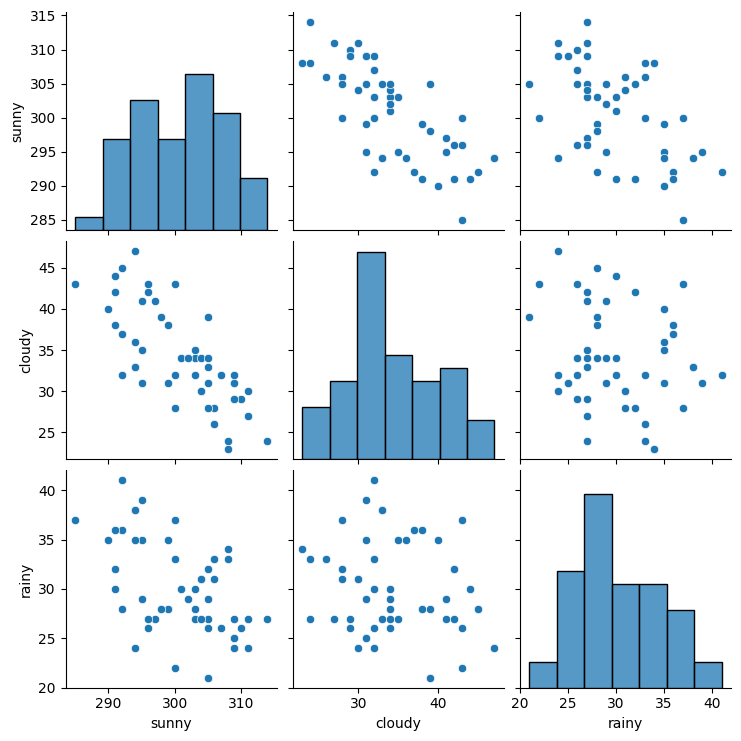

'\nYou have successfully sampled from a multinomial distribution! Note in this case, you are dealing with three probabilities, while in the video you saw only two: the probabilities of heads and tails. As long as the probabilities add up to one, this distribution can handle any number of probabilities!\n'

In [19]:
# exercise 09

"""
Multinomial sampling

Imagine a small town in Colorado, USA, which has on average 300 sunny days, 35 cloudy days, and 30 rainy days each year. As a scientist studying climate change, you are interested in the distributions of sunny, cloudy, and rainy days in a random span of 50 years if these averages are assumed to remain the same.

The following packages have been imported for you: seaborn as sns, pandas as pd, matplotlib.pyplot as plt, and scipy.stats as st.
"""

# Instructions

"""


    Define the probabilities of sunny, cloudy, and rainy days.
---


    Using the .rvs() function with the correct SciPy distribution, simulate results for each variable.
    Complete the definition of df_days so that sns.pairplot() correctly displays the simulation results.

"""

# solution

p_sunny = 300/365
p_cloudy = 35/365
p_rainy = 30/365
num_of_days_in_a_year = 365
number_of_years = 50

# Simulate results
days = st.multinomial.rvs(num_of_days_in_a_year,
    [p_sunny, p_cloudy, p_rainy], size=number_of_years)

# Complete the definition of df_days
df_days = pd.DataFrame({"sunny": days[:,0],
     "cloudy": days[:,1],
     "rainy":  days[:,2]})
sns.pairplot(df_days)
plt.show()

#----------------------------------#

# Conclusion

"""
You have successfully sampled from a multinomial distribution! Note in this case, you are dealing with three probabilities, while in the video you saw only two: the probabilities of heads and tails. As long as the probabilities add up to one, this distribution can handle any number of probabilities!
"""

In [20]:
house_price_size = pd.read_csv(path_data+'house_price_size.csv')
house_price_size.head()

,price,size
0,23.529486,739.368724
1,20.475001,439.473858
2,20.787595,628.296385
3,30.472277,1033.150622
4,15.799313,224.130772


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


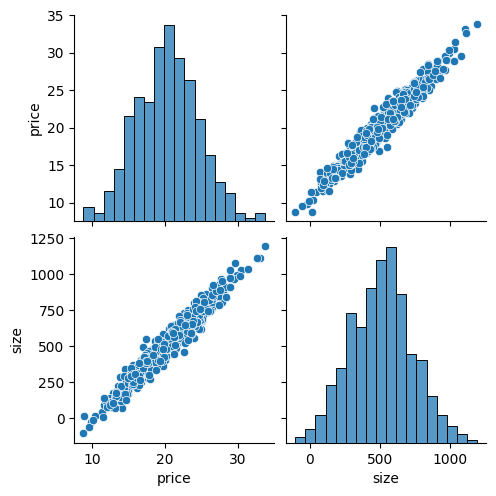

            price          size
price   18.304460    921.704422
size   921.704422  49149.536764


"\nGreat work. You probably noticed a fairly strong positive covariance based on the scatterplots generated in the first step of this exercise. House prices and sizes seem to rise together. Your covariance matrix in the second step confirmed this! Now that you have explored the data, let's see how you can use sampling to obtain simulated results!\n"

In [21]:
# exercise 10

"""
Exploring a multivariate normal distribution

In this exercise, you'll be working with a DataFrame called house_price_size, which contains two columns called price and size, representing the price and size of houses, respectively.

You'll first explore the data to gain some understanding of the distribution and relationship of the two variables price and size, and then you will obtain a covariance matrix for these two variables.

The following packages have been imported for you: seaborn as sns, pandas as pd, and matplotlib.pyplot as plt.
"""

# Instructions

"""

    Using pairplot(), generate scatterplots and histograms to explore the patterns of the data in house_price_size.
---


    Estimate the variance and covariances of house prices and sizes using the existing data.

"""

# solution

sns.pairplot(house_price_size)
plt.show()

# Estimate the variance and covariances of house prices and sizes
print(house_price_size.cov())

#----------------------------------#

# Conclusion

"""
Great work. You probably noticed a fairly strong positive covariance based on the scatterplots generated in the first step of this exercise. House prices and sizes seem to rise together. Your covariance matrix in the second step confirmed this! Now that you have explored the data, let's see how you can use sampling to obtain simulated results!
"""

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


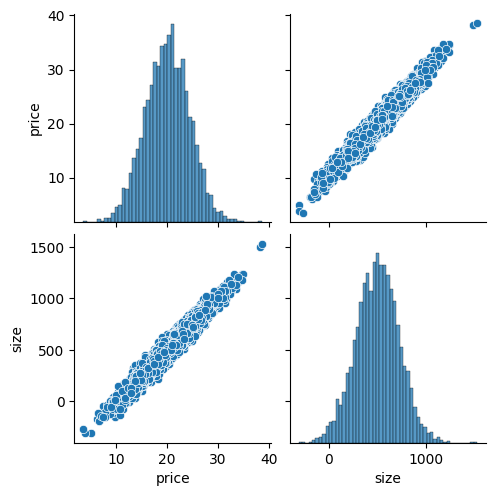

"\nTriumph! You've successfully performed multivariate normal sampling with a defined covariance structure: you can see the correlation in the scatter plots. You have proven that you've got a great understanding of foundational probability distributions and now you're ready to move onto a principled Monte Carlo simulation!\n"

In [22]:
# exercise 11

"""
Multivariate normal sampling

In this exercise, you'll continue working with the house_price_size DataFrame, which has been loaded for you. As a reminder, house_price_size contains two columns called price and size representing the price and size of houses in that order.

Having explored the house_price_size DataFrame, you suspect that this is a multivariate normal distribution because price and size each seem to follow a normal distribution. Based on the covariance matrix that you calculated in the previous exercise, you can now perform multivariate normal distribution sampling with a defined covariance structure!

To perform multivariate normal distribution sampling with defined covariance, you'll need the following information:

    price has a mean of 20 and size has a mean of 500
    price has a variance of 19 and size has a variance of 50,000
    The covariance for price and size is 950
    You'll sample 5,000 times

The following imports have been completed for you: seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt, and scipy.stats as st.
"""

# Instructions

"""


    Set up the parameters for multivariate normal sampling based on the stated means, variances, covariance, and sample size.
---


    Simulate the results with sampling by using st.multivariate_normal.rvs(); store the results as simulated_results.
    Visualize the results using a pairplot().

"""

# solution

mean_value = [20, 500]
sample_size_value = 5000
cov_mat = np.array([[19, 950], [950, 50000]])

# Simulate the results using sampling
simulated_results = st.multivariate_normal.rvs(mean=mean_value, size=sample_size_value, cov=cov_mat)
simulated_house_price_size = pd.DataFrame({"price":simulated_results[:,0],
                         				   "size":simulated_results[:,1]})

# Visualize the results 
sns.pairplot(simulated_house_price_size)
plt.show()

#----------------------------------#

# Conclusion

"""
Triumph! You've successfully performed multivariate normal sampling with a defined covariance structure: you can see the correlation in the scatter plots. You have proven that you've got a great understanding of foundational probability distributions and now you're ready to move onto a principled Monte Carlo simulation!
"""